In [311]:
import numpy as np
import sympy as sp
from functions import *

In [312]:
f = 1 #frequency
t = np.arange(0,10.01,0.0002) #time interval
u = 0.45/0.7 * np.sin(2*np.pi*f*t)
v = -0.2/0.7 * np.sin(2*np.pi*f*t)

E_plastic = np.zeros((3,3,len(t)))
E = np.zeros((3,3,len(t)))
E_true = np.zeros((3,3,len(t)))

for i in range(len(t)):
    E[:,:,i] = np.array([[u[i],0,0],[0,v[i],0],[0,0,0]])
    E_true[:,:,i] = true_strain(E[:,:,i])

#Defining elastic properties
E = 40
v = 0
C_e = Ce(E,v)
print(C_e)

[[40.  0.  0.]
 [ 0. 40.  0.]
 [ 0.  0. 40.]]


In [313]:
stress_x_plot = [0]
stress_y_plot = [0]
stress_z_plot = [0]
strain_mises_plot = [0]
stress_mises_plot = [0]
tau_0 = np.zeros((3,3))
epsilon_0 = np.zeros((3,3))
s_yield1 = 15
s_yield2 = 22 #(where it becomes straight again)
k = 0
hc = (22-15)/(1.5-0.375)


In [314]:
for i in range(len(t)):
    delta_epsilon = E_true[:,:,i]- epsilon_0
    tau_e = tau_0 + C_e @ delta_epsilon

    #check von-mises
    vonmises = von_mises_stress(np.array(tau_e))

    if vonmises - s_yield1> 0:
        tau_c = tau_e
        epsilon_c = epsilon_0 + delta_epsilon
        m_c,n_c,h = nandm(np.array(tau_c))

        delta_lambda = np.sum(np.dot(m_c, C_e @ delta_epsilon))/(hc +np.sum(np.dot(m_c, C_e @ m_c)))
        tau_t = tau_e - delta_lambda*C_e @ m_c
        delta_epsilon_plastic = delta_lambda*m_c
        E_plastic[:,:,i] += delta_epsilon_plastic
        #update limit
        # k = k + delta_lambda * hc
        # s_yield1 = k + s_yield1
        s_yield1 = von_mises_stress(np.array(tau_0))
        if s_yield1 >= s_yield2:
            hc = 0
    else:
        tau_t = tau_e

    tau_0 = tau_t
    epsilon_0 = epsilon_0 + delta_epsilon
    epsilon_vm = von_mises_strain(epsilon_0)
    tau_vm = von_mises_stress_sign(np.array(tau_0))
    
    stress_x_plot.append(tau_0[0,0])
    stress_y_plot.append(tau_0[1,1])
    stress_z_plot.append(tau_0[2,2])
    stress_mises_plot.append(tau_vm)
    strain_mises_plot.append(epsilon_vm)

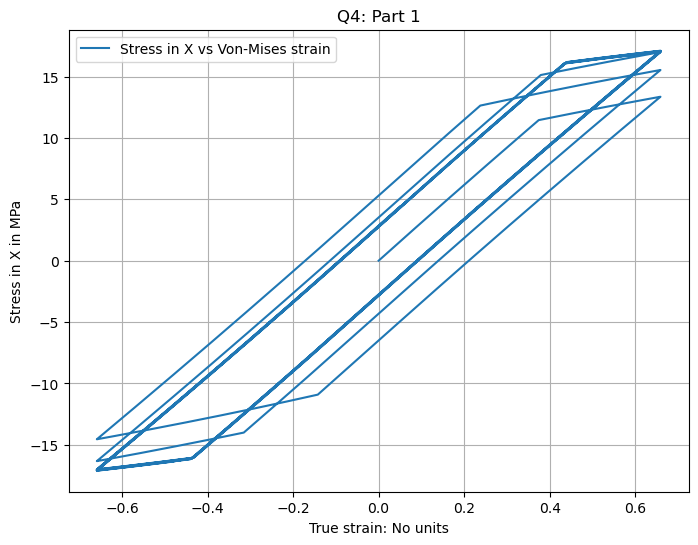

In [315]:
plt.figure(figsize=(8, 6))
plt.plot(strain_mises_plot,stress_x_plot,label = "Stress in X vs Von-Mises strain")
plt.xlabel("True strain: No units")
plt.ylabel("Stress in X in MPa")
plt.title("Q4: Part 1")
plt.legend()
plt.grid(True)
plt.show()



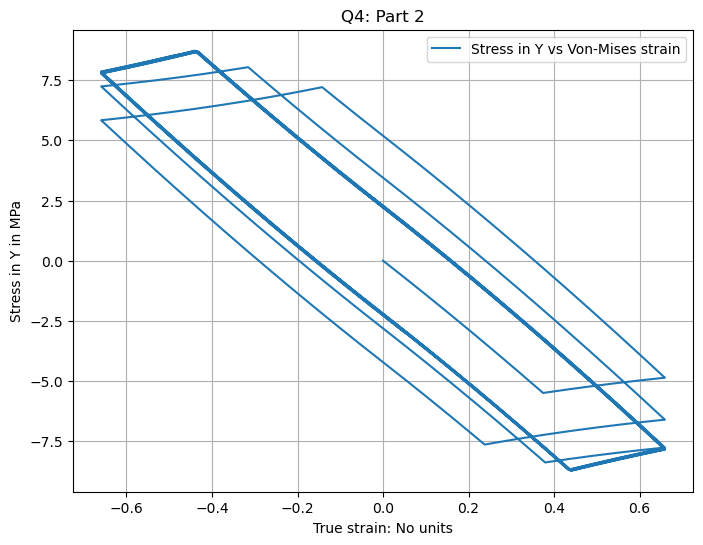

In [316]:
plt.figure(figsize=(8, 6))
plt.plot(strain_mises_plot,stress_y_plot,label = "Stress in Y vs Von-Mises strain")
plt.xlabel("True strain: No units")
plt.ylabel("Stress in Y in MPa")
plt.title("Q4: Part 2")
plt.legend()
plt.grid(True)
plt.show()


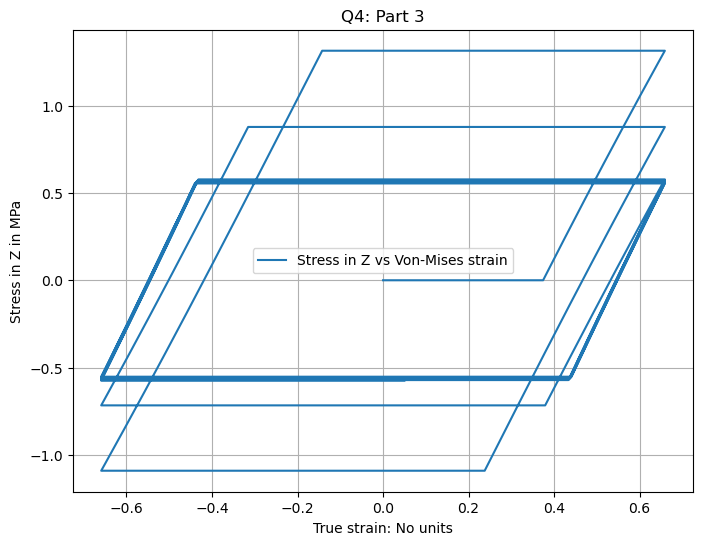

In [317]:

plt.figure(figsize=(8, 6))
plt.plot(strain_mises_plot,stress_z_plot,label = "Stress in Z vs Von-Mises strain")
plt.xlabel("True strain: No units")
plt.ylabel("Stress in Z in MPa")
plt.title("Q4: Part 3")
plt.legend()
plt.grid(True)
plt.show()


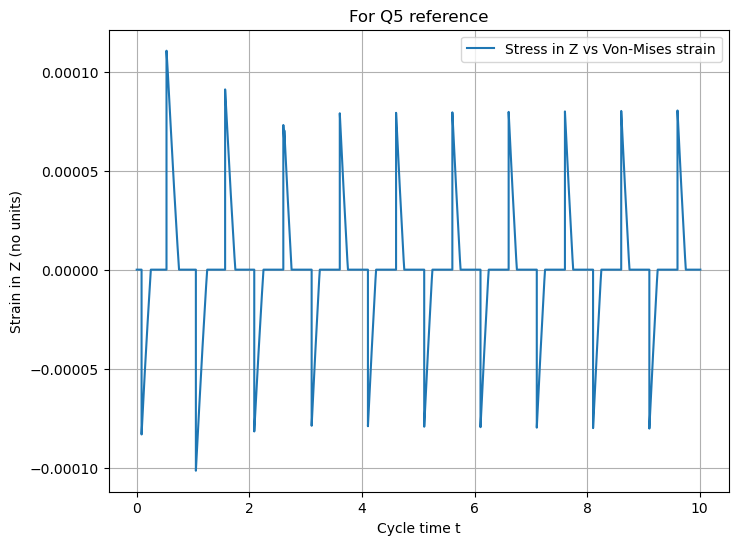

In [318]:

plt.figure(figsize=(8, 6))
plt.plot(t,E_plastic[2,2,:],label = "Stress in Z vs Von-Mises strain")
plt.xlabel("Cycle time t")
plt.ylabel("Strain in Z (no units)")
plt.title("For Q5 reference")
plt.legend()
plt.grid(True)
plt.show()


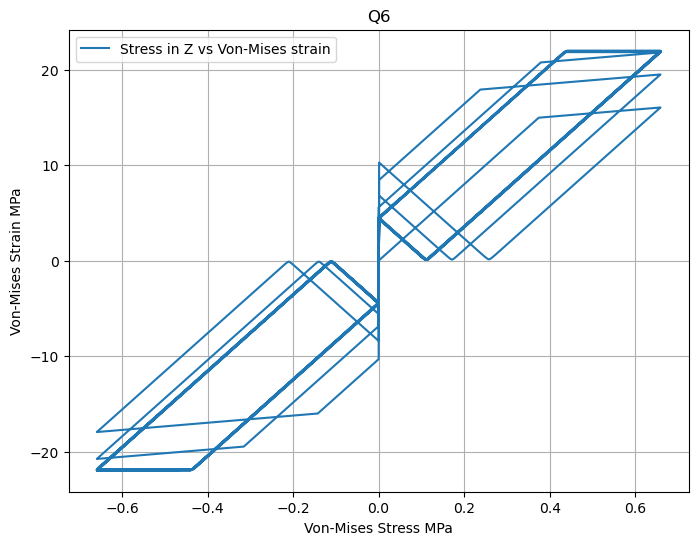

In [319]:

plt.figure(figsize=(8, 6))
plt.plot(strain_mises_plot,stress_mises_plot,label = "Stress in Z vs Von-Mises strain")
plt.xlabel("Von-Mises Stress MPa")
plt.ylabel("Von-Mises Strain MPa")
plt.title("Q6")
plt.legend()
plt.grid(True)
plt.show()